The project uses customer banking data to predict which product a given customer will most likely purchase.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bank = pd.read_csv("drive/MyDrive/Projects/Deploy/Bank Customers Prediction/Code/Bank customers.csv")
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
bank.shape

(10127, 21)

In [5]:
bank.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
bank.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


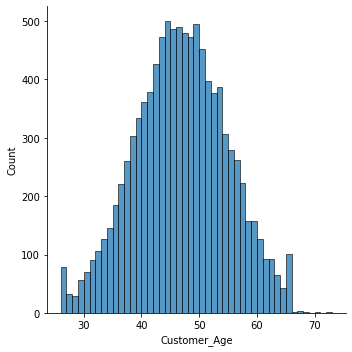

In [11]:
# Distribution of Customer age
sns.displot(bank['Customer_Age'], kde=False)

In [12]:
# Return the minimum and maximum age for each card type
bank_cards = bank.groupby("Card_Category")
print('max age of each card type:', bank_cards['Customer_Age'].max())
print('\n')
print('min age of each card type:', bank_cards['Customer_Age'].min())

max age of each card type: Card_Category
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Customer_Age, dtype: int64


min age of each card type: Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64


In [13]:
bank['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [14]:
# Average credit limit by gender

bank[['Gender','Credit_Limit']].groupby('Gender').agg(['mean','count'])

Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

In [15]:
bank['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [16]:
bank.groupby("Marital_Status")['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: Card_Category, dtype: int64

In [17]:
bank['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [18]:
bank['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

# Saving data to Google Cloud Storage

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
project_id = 'sixth-flag-316719'

In [ ]:
# Save customer baking data to a Google Storage bucket for Data Studio dashboard

bank_df = bank.copy()

bank_df.to_csv('bank_customers.csv')

!gcloud config set project {project_id}

import uuid

bucket_name = 'bank_customer_data'

!gsutil mb gs://{bucket_name}

!gsutil cp bank_customers.csv gs://{bucket_name}/

Updated property [core/project].
Creating gs://bank_customer_data/...
Copying file://bank_customers.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/1.3 MiB.                                      


Link for dashboard on Google Data Studio
https://datastudio.google.com/reporting/bc867740-f4fa-4ba5-ab7b-9673b3a58af7

# Preprocessing data for modeling

In [19]:
bank['Gender'] = bank['Gender'].map({'M':1, 'F':0})

In [20]:
bank['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [21]:
bank['Attrition_Flag'] = bank['Attrition_Flag'].map({'Existing Customer':1, 'Attrited Customer':0})

In [22]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [23]:
bank['Income_Category'] = label_encoded(bank['Income_Category'])
bank['Education_Level'] = label_encoded(bank['Education_Level'])
bank['Marital_Status'] = label_encoded(bank['Marital_Status'])

Income_Category ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Education_Level ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status ['Divorced' 'Married' 'Single' 'Unknown']


In [24]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [25]:
bank['CLIENTNUM'].nunique()

10127

In [26]:
# Column CLIENTNUM is unique for each customer and will be dropped

bank = bank.drop(['CLIENTNUM'], axis=1)

## Create and evaluate model for prediction

In [27]:
X = bank.drop(['Card_Category'], axis=1)
y = bank['Card_Category']

# PCA

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)
pca_fit = pca.fit_transform(X)

In [48]:
pca_fit.shape

(10127, 7)

In [52]:
pca.components_

array([[ 4.05495561e-07,  7.62717610e-07,  1.62788069e-05,
         6.91223969e-06,  4.14778210e-07,  1.89116529e-06,
        -2.62330987e-05,  4.11410236e-06, -9.22584924e-06,
        -1.48930197e-06,  1.87385731e-06,  7.06246378e-01,
        -9.72176294e-05,  7.06343595e-01,  1.82323790e-07,
         4.79035017e-02,  1.52521685e-04, -9.18264702e-08,
        -1.09654732e-05],
       [ 1.87100860e-05, -1.13443076e-04, -7.72249123e-06,
         4.98397146e-06,  8.25583288e-06,  8.61237552e-06,
         1.17850528e-05, -9.64195711e-05, -1.57406503e-04,
        -1.03827926e-05, -3.93438920e-05, -2.50777435e-02,
         1.75711223e-02, -4.26488658e-02,  2.53778168e-06,
         9.98604753e-01,  5.65099016e-03,  6.29661827e-06,
         1.13883129e-06],
       [ 9.27274180e-05,  1.46890691e-04,  1.71056794e-05,
        -4.58949196e-06,  1.28350505e-05, -2.09130857e-05,
        -4.24939539e-05,  9.28578649e-05,  5.95416078e-05,
        -4.04575939e-05, -5.04530135e-05,  4.08966760e-01,
    

In [30]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit, y, test_size=0.2, random_state = 42)

# Random Forest method

In [31]:
from sklearn.ensemble import RandomForestClassifier

RFc = RandomForestClassifier()

# Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

GBc = GradientBoostingClassifier()

# Evaluate models

In [33]:
from sklearn.metrics import accuracy_score, classification_report

In [34]:
RFc.fit(Xtrain, ytrain)

RFc_pred = RFc.predict(Xtest)

In [35]:
GBc.fit(Xtrain, ytrain)

GBc_pred = GBc.predict(Xtest)

In [36]:
print('Random Forest accuracy on training data:', round(RFc.score(Xtrain, ytrain), 2))
print('Random Forest accuracy on testing data:', round(RFc.score(Xtest, ytest), 2))

Random Forest accuracy on training data: 1.0
Random Forest accuracy on testing data: 0.93


In [37]:
print(classification_report(ytest, RFc_pred))

              precision    recall  f1-score   support

        Blue       0.95      0.99      0.97      1879
        Gold       0.00      0.00      0.00        23
    Platinum       0.00      0.00      0.00         5
      Silver       0.52      0.27      0.36       119

    accuracy                           0.93      2026
   macro avg       0.37      0.31      0.33      2026
weighted avg       0.91      0.93      0.92      2026



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print('Gradient Boosting accuracy on training data:', round(GBc.score(Xtrain, ytrain), 2))
print('Gradient Boosting accuracy on testing data:', round(GBc.score(Xtest, ytest), 2))

Gradient Boosting accuracy on training data: 0.96
Gradient Boosting accuracy on testing data: 0.93


In [39]:
print(classification_report(ytest, GBc_pred))

              precision    recall  f1-score   support

        Blue       0.95      0.99      0.97      1879
        Gold       0.00      0.00      0.00        23
    Platinum       0.00      0.00      0.00         5
      Silver       0.48      0.24      0.32       119

    accuracy                           0.93      2026
   macro avg       0.36      0.31      0.32      2026
weighted avg       0.91      0.93      0.92      2026



In [44]:
importances = GBc.feature_importances_
importances

array([0.67719869, 0.111371  , 0.0501652 , 0.03715315, 0.04775407,
       0.02756697, 0.04879092])

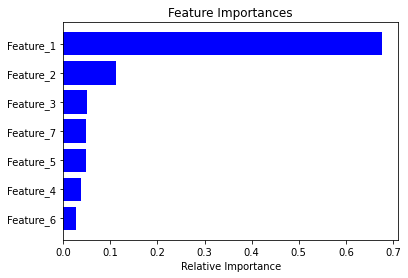

In [49]:
importances = GBc.feature_importances_

indices = np.argsort(importances)

Features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7']

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [Features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

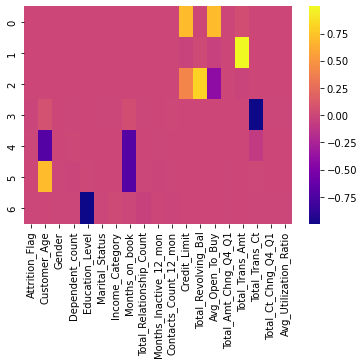

In [56]:
# Attributes of Feature 1 weigh in the most to the model
# Feature 1 is mainly total transaction amount
# Credit limit and total revolving balance are the next important features

df_comp = pd.DataFrame(pca.components_, columns=X.columns)
sns.heatmap(df_comp, cmap='plasma')